In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.tools.eval_measures import rmse

# 均方差(mean-square error),L2 Loss
![](https://tva1.sinaimg.cn/large/e6c9d24ely1h6daw93aa8j207302tweb.jpg)

In [32]:
def mse(true, predict):
    return np.sum((true - predict) ** 2)

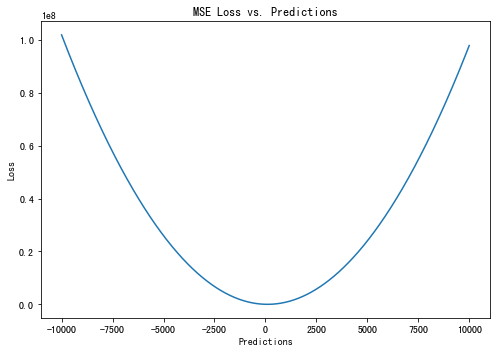

In [33]:
fig, ax1 = plt.subplots(1,1, figsize = (7,5))

# array of same target value 10000 times
target = np.repeat(100, 10000)
pred = np.arange(-10000,10000, 2)

loss_mse = [mse(target[i], pred[i]) for i in range(len(pred))]

# plot
ax1.plot(pred, loss_mse)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("MSE Loss vs. Predictions")

fig.tight_layout()

# 均绝对误差Mean Absolute Error, L1 Loss
![](https://tva1.sinaimg.cn/large/e6c9d24ely1h6dbn2py96j207502nzk3.jpg)

In [34]:
def mae(true,predict):
    return np.sum(np.abs(true-predict))

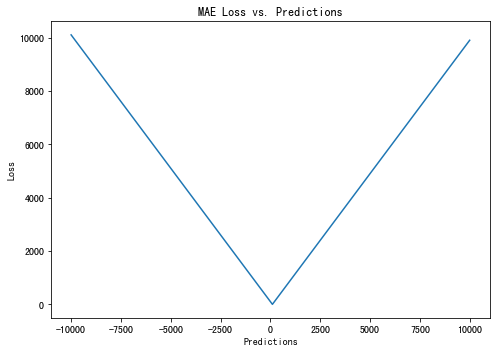

In [35]:
fig, ax1 = plt.subplots(1,1, figsize = (7,5))

# array of same target value 10000 times
target = np.repeat(100, 10000)
pred = np.arange(-10000,10000, 2)

loss_mae = [mae(target[i], pred[i]) for i in range(len(pred))]

# plot
ax1.plot(pred, loss_mae)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("MAE Loss vs. Predictions")

fig.tight_layout()

# 两种损失函数对比

## 均方差比均绝对值差更容易受异常值影响。这是因为，方差会对误差进行平方操作。<br>
![](https://tva1.sinaimg.cn/large/e6c9d24ely1h6dchh533gj20mk07f0tc.jpg)
![](https://tva1.sinaimg.cn/large/e6c9d24ely1h6dcin24pej20dc0dc0st.jpg)
从上面图片可以看出，当误差｜e｜>1的时候，e^2会远大于｜e｜。这将使具有MSE损失的模型比具有MAE损失的模型对<font color='red'>异常值</font>给予更多的权重。在这种情况下，以RMSE为损失的模型将被调整为最小化那个单一的离群值案例，而牺牲其他普通的例子，这将降低其整体性能。<br>
对于数据集中的异常值，L2(Loss函数)试图根据这些异常值来调整模型，以牺牲其他良好样本为代价，因为对于这些异常值来说，平方误差将是巨大的（对于误差>1）<br>
如果训练数据被异常值破坏，MAE损失是有用的（即我们在训练环境中错误地收到了不真实的巨大负值/正值，但在测试环境中却没有）。
因此，如果你可以忽略数据集中的离群值，或者你需要它们的存在，那么你应该使用L1损失函数，另一方面，如果你不希望数据集中存在不想要的离群值，并且希望使用一个稳定的解决方案，那么首先你应该尝试去除离群值，然后使用L2损失函数。否则，由于数据集中存在异常值，使用L2损失函数的模型的性能可能会严重恶化。

如果有疑问，请选择L2损失函数，它在大多数情况下都很好用。

## 使用MAE损失（尤其是对于神经网络）的一个大问题是，它的梯度自始至终都是一样的，这意味着即使损失值很小，梯度也会很大。
这对学习来说并不是好事。为了解决这个问题，我们可以使用动态学习率，当我们接近最小值时，学习率会降低。在这种情况下，MSE的表现很好，即使使用固定的学习率也会收敛。MSE损失的梯度对于较大的损失值来说是很高的，并且随着损失接近0而减少，使得它在训练结束时更加精确（见下图。）
![](https://tva1.sinaimg.cn/large/e6c9d24ely1h6dcnopayqj20t6092aan.jpg)

## 决定使用哪一种损失函数
如果异常值代表了对业务很重要的异常，应该被检测出来，那么我们应该使用MSE。另一方面，如果我们认为异常值只是代表损坏的数据，那么我们应该选择MAE作为损失。

# 实践

In [38]:
data = pd.read_csv('./Housing.csv')

In [39]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [41]:
X = data.drop('medv',axis=1)
y = data['medv']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Regression without any Outliers

In [45]:
# GradientBoostingRegressor with a L1(Least Absolute Deviations) loss function
# Set a random seed so that we can reproduce the results
np.random.seed(32767)
model = GradientBoostingRegressor(loss='absolute_error')
fit = model.fit(X_train,y_train)
predict = fit.predict(X_test)
print(rmse(predict,y_test))

3.3727764836044583


In [46]:
# GradientBoostingRegressor with L2(Least Square errors) loss function
model = GradientBoostingRegressor(loss='squared_error')
fit = model.fit(X_train,y_train)
predict = fit.predict(X_test)
print(rmse(predict,y_test))

2.5020831674646473


在没有异常值的情况下，均方差是优于均绝对误差的

## Regression with Outliers

### 构造异常值

In [53]:
# Get upper and lower bounds[min, max] of all the features
stats = data.describe()
extremes = stats.loc[['min', 'max'],:].drop('medv', axis = 1)
extremes

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
min,0.00632,0.0,0.46,0.0,0.385,3.561,2.9,1.1296,1.0,187.0,12.6,0.32,1.73
max,88.97620,100.0,27.74,1.0,0.871,8.780,100.0,12.1265,24.0,711.0,22.0,396.90,37.97


In [55]:
# Set a random seed
np.random.seed(1234)

# Create 5 random values
rands = np.random.rand(5, 1)
rands

# Get the 'min' and 'max' rows as numpy array
min_array = np.array(extremes.loc[['min'], :])
max_array = np.array(extremes.loc[['max'], :])

# Find the difference(range) of 'max' and 'min'
range = max_array - min_array

# Generate 5 samples with 'rands' value
outliers_X = (rands * range) + min_array
outliers_X

array([[1.70457825e+01, 1.91519450e+01, 5.68465061e+00, 1.91519450e-01,
        4.78078453e-01, 4.56054001e+00, 2.14965386e+01, 3.23572024e+00,
        5.40494736e+00, 2.87356192e+02, 1.44002828e+01, 7.62727836e+01,
        8.67066488e+00],
       [5.53552627e+01, 6.22108771e+01, 1.74311273e+01, 6.22108771e-01,
        6.87344863e-01, 6.80778568e+00, 6.33067617e+01, 7.97086794e+00,
        1.53085017e+01, 5.12984996e+02, 1.84478224e+01, 2.47035896e+02,
        2.42752219e+01],
       [3.89509044e+01, 4.37727739e+01, 1.24012127e+01, 4.37727739e-01,
        5.97735681e-01, 5.84550107e+00, 4.54033635e+01, 5.94324817e+00,
        1.10677380e+01, 4.16369335e+02, 1.67146407e+01, 1.73914067e+02,
        1.75932533e+01],
       [6.98795789e+01, 7.85358584e+01, 2.18845822e+01, 7.85358584e-01,
        7.66684272e-01, 7.65978645e+00, 7.91583185e+01, 9.76610981e+00,
        1.90632474e+01, 5.98527898e+02, 1.99823707e+01, 3.11777507e+02,
        3.01913951e+01],
       [6.94006741e+01, 7.79975808e+

In [56]:
# We will also create some hard coded outliers
# for 'medv', i.e. our target
medv_outliers = np.array([0, 0, 600, 700, 600])

Text(0, 0.5, 'count')

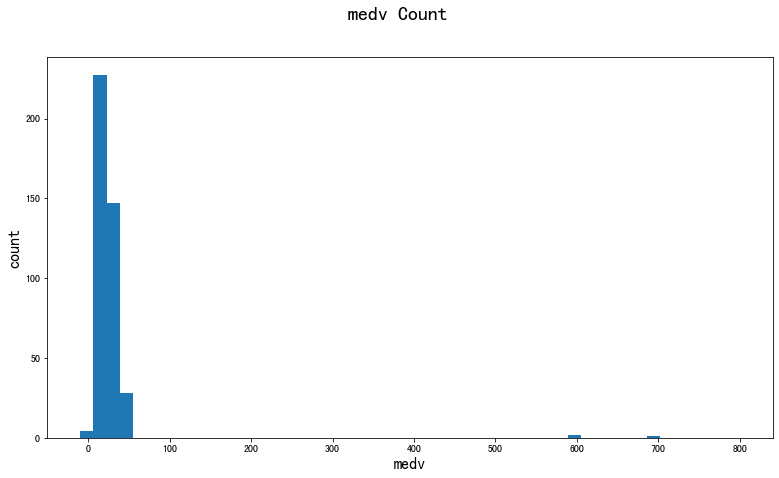

In [61]:
# Change the type of 'chas', 'rad' and 'tax' to rounded of Integers
outliers_X[:, [3, 8, 9]] = np.int64(np.round(outliers_X[:, [3, 8, 9]]))

# Finally concatenate our existing 'train_X' and
# 'train_y' with these outliers
X_train = np.append(X_train, outliers_X, axis = 0)
y_train = np.append(y_train, medv_outliers, axis = 0)

# Plot a histogram of 'medv' in train_y
fig = plt.figure(figsize=(13,7))
plt.hist(y_train, bins=50, range = (-10, 800))
fig.suptitle('medv Count', fontsize = 20)
plt.xlabel('medv', fontsize = 16)
plt.ylabel('count', fontsize = 16)

In [62]:
np.random.seed(9876)
model = GradientBoostingRegressor(loss='absolute_error')
fit = model.fit(X_train,y_train)
predict = fit.predict(X_test)
print(rmse(predict,y_test))

3.6591252167898443


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [63]:
model = GradientBoostingRegressor(loss='squared_error')
fit = model.fit(X_train,y_train)
predict = fit.predict(X_test)
print(rmse(predict,y_test))

9.779870068746199


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [64]:
X_train

array([[1.50234000e+01, 0.00000000e+00, 1.81000000e+01, ...,
        2.02000000e+01, 3.49480000e+02, 2.49100000e+01],
       [6.27390000e-01, 0.00000000e+00, 8.14000000e+00, ...,
        2.10000000e+01, 3.95620000e+02, 8.47000000e+00],
       [3.46600000e-02, 3.50000000e+01, 6.06000000e+00, ...,
        1.69000000e+01, 3.62250000e+02, 7.83000000e+00],
       ...,
       [3.89509044e+01, 4.37727739e+01, 1.24012127e+01, ...,
        1.67146407e+01, 1.73914067e+02, 1.75932533e+01],
       [6.98795789e+01, 7.85358584e+01, 2.18845822e+01, ...,
        1.99823707e+01, 3.11777507e+02, 3.01913951e+01],
       [6.94006741e+01, 7.79975808e+01, 2.17377400e+01, ...,
        1.99317726e+01, 3.09642806e+02, 2.99963233e+01]])

通过对比，发现当异常值存在时，L1的表现更好

# 相关题目

平方根误差的“意外”。
Hulu作为一家流媒体公司,拥有众多的美剧资源,预测每部美剧的流量趋势对于广告投放、用户增长都非常重要。我们希望构建一个回归模型来预测某部美剧的流量趋势,但无论采用哪种回归模型,得到的RMSE指标都非常高。然而事实是,模型在95%的时间区间内的预测误差都小于1%,取得了相当不错的预测结果。那么,造成RMSE指标居高不下的最可能的原因是什么?

一般情况下,RMSE能够很好地反映回归模型预测值与真实值的偏离程度。但在实际问题中,如果存在个别偏离程度非常大的离群点(Outlier)时,即使离群点数量非常少,也会让RMSE指标变得很差。
回到问题中来,模型在95%的时间区间内的预测误差都小于1%,这说明,在大部分时间区间内,模型的预测效果都是非常优秀的。然而,RMSE却一直很差,这很可能是由于在其他的5%时间区间内存在非常严重的<font color='red'>离群点</font>。**事实上,在流量预估这个问题中,噪声点确实是很容易产生的,比如流量特别小的美剧、刚上映的美剧或者刚获奖的美剧,甚至一些相关社交媒体突发事件带来的流量,都可能会造成离群点。**

针对这个问题,有什么解决方案呢?可以从三个角度来思考。第一,如果我们认定这些离群点是“噪声点”的话,就需要在数据预处理的阶段把这些噪声点过滤掉。第二,如果不认为这些离群点是“噪声点”的话,就需要进一步提高模型的预测能力,将离群点产生的机制建模进去(这是一个宏大的话题,这里就不展开讨论了)。第三,可以找一个更合适的指标来评估该模型。关于评估指标,其实是存在比RMSE的鲁棒性更好的指标,比如平均绝对百分比误差(Mean Absolute Percent Error,MAPE),它定义为